<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capitulo #2 - Modelo Lineal Multivariado

In [306]:
# Instalacion de Paquetes
!pip install pingouin # No incluido en Google Colab
# !pip install scipy
# !pip install statsmodels

# Version rpy2 que no tiene problemas de compatibilidad
!pip install rpy2==3.5.1

# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import math

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)

# Recursion limit errors with R Magic
import sys
# sys.setrecursionlimit(50000)

# Activamos R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

# # ## MVN Henze-Zirkler Test ### -> Lento
# # # system(sudo apt install libgsl-dev)
# # install.packages('MVN')

# ## QQ Plot, Bonferroni, outlierTest, vif ### -> Lento
install.packages('car')

## Wald Test ### -> Rapido
install.packages('aod')

# LRM Tests ### -> Rapido
install.packages('lmtest')

## Box-Cox Transformation ### -> Rapido
install.packages('MASS') # Huber, LTS

## Estimaciones Robustas ### ->
install.packages('quantreg') # LAD
install.packages('robustbase') # lmrob
# install.packages('olsrr')

## Seleccion de Variables ### -> Rapido
install.packages('leaps') # -> regsubsets

In [399]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float

######################################################
# Peso, Edad, Colesterol
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
%R -i dataP
######################################################
# Cars con Modelo Lineal
id = '15pf-6P4Ek2rp6mYmfOybHRqAxqOoTp6i'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cars.csv')
dataC = pd.read_csv('cars.csv')
%R -i dataC
model_cars = smf.ols('dist ~ speed', data=dataC).fit()
######################################################
# University
id = '16kLQNXhyweAi38xR2IeQCCagVcU725UZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('University.csv')
dataU = pd.read_csv('University.csv')
######################################################
# Iris
dataI = sns.load_dataset('iris')
%R -i dataI
######################################################
# Gorriones
id = '15G6jIOMiuWaTs-qy7eUXwhED4delBMl6'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('gorriones.xlsx')
dataO = pd.read_excel('gorriones.xlsx')
dataO.rename(columns=
            {'largototal':'Largo', 'extension ':'Alas', 'cabeza':'Cabeza',
             'humero':'Pata', 'esternon':'Cuerpo', 'sobrevida ':'Target'},
            inplace=True)
%R -i dataO
######################################################
# Madera
id = '17F8XFNpCszGHFfs7CpXzZotfmWmXXhoi'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('madera.csv')
dataM = pd.read_csv('madera.csv').drop(columns='Unnamed: 0')
%R -i dataM

######################################################
# Duncan
id = '17aCADG_APoFTsCdPvdI5T25gBAUE8U2T'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Duncan.csv')
dataD = pd.read_csv('Duncan.csv')
%R -i dataD

######################################################
# Infants
id = '17qgVDqEcWeevZh2dHlvPIQ4ueAcTzSjU'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('low_birth_weight_infants.xlsx')
dataF = pd.read_excel('low_birth_weight_infants.xlsx')
%R -i dataF

######################################################
# MT Cars
id = '17vmBKWIJUt3uiry6WH5-Tyu3ab_mVdX8'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('mtcars.csv')
dataA = pd.read_csv('mtcars.csv')
dataA.drop(columns='model', inplace=True)
%R -i dataA

######################################################
# Fingerprints
id = '17zjDDk7VZ1fb_6A-UOaDGpzLUyNeG5AW'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('fingerprints.csv')
dataFP = pd.read_csv('fingerprints.csv').drop(columns='Unnamed: 0')
%R -i dataFP

######################################################
# Carseats
id = '17d0yuvZLyRBM5INORFMzlJSBzkL-I8wI'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Carseats.csv')
dataS = pd.read_csv('Carseats.csv')
%R -i dataS

######################################################
# Publicidad
id = '170luIH1wgjs290gtW7ywp70bjhOlUpAV'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('publicidad.xlsx')
dataPu = pd.read_excel('publicidad.xlsx')
dataPu.drop(columns='orden', inplace=True)
%R -i dataPu

## 2.1 Modelo Aditivo

In [400]:
# # Cargamos el Dataset
%%R

library(dplyr)

data <- as.data.frame(trees)

head(data)

  Girth Height Volume
1   8.3     70   10.3
2   8.6     65   10.3
3   8.8     63   10.2
4  10.5     72   16.4
5  10.7     81   18.8
6  10.8     83   19.7


### Visaluzacion de la Asociacion entre las Variables

<Axes: >

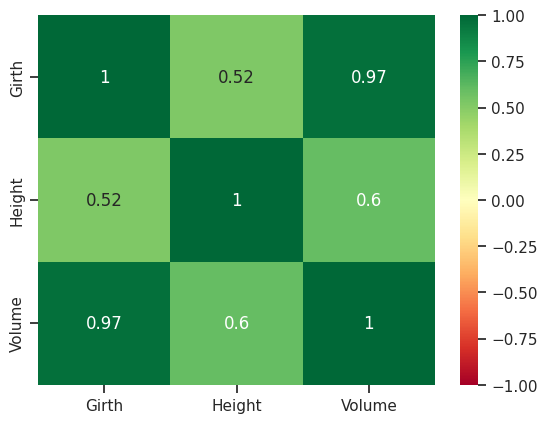

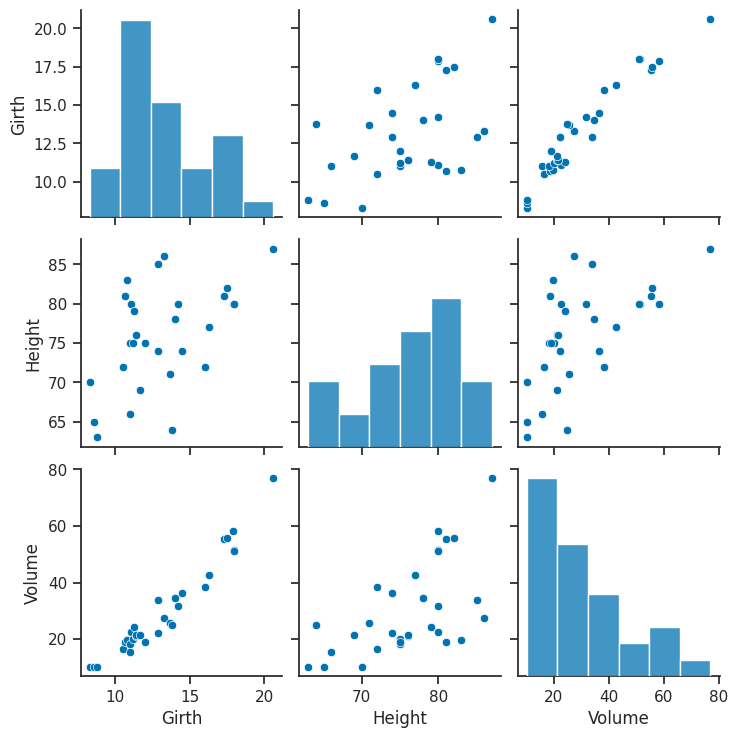

In [401]:
# Visualizamos
%R -o data

display(sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)) # Todos contra todos
plt.show()

sns.pairplot(data=data)
plt.show()

- Se observa una asociacion lineal muy fuerte entre la variable predictora Girth, y la variable respuesta Volume. El coeficiente de correlacion de Pearson es de 0.97
- La otra variable predictora Girth tiene una asociacion moderada, con un coeficiente de correlacion de .6

### Analisis de Diagnostico Modelo 1

In [402]:
%%R
library(car)

# Modelamos
model1 <- lm(Volume ~ Girth, data=data)
resid1 <- model1$resid
fitted1 <- model1$fitted.values

#### Normalidad de los Residuos


	Shapiro-Wilk normality test

data:  model1$resid
W = 0.97889, p-value = 0.7811

[1] 31 20


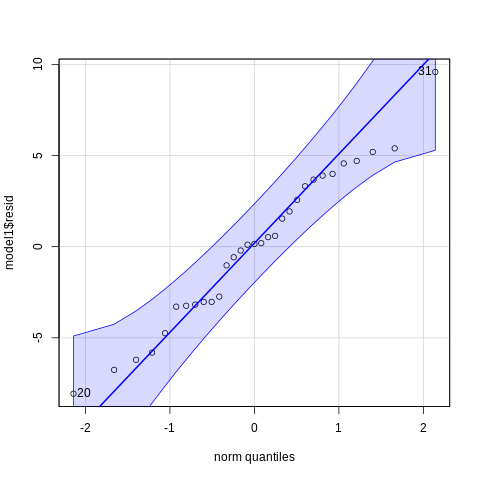

In [403]:
# Residuals Normality
%%R

print(shapiro.test(model1$resid))
qqPlot(model1$resid)

- Relizamos un test de Normalidad de Shapiro. No hay suficiente evidencia para rechazar la Hipotesis Nula de que los datos estan Distribuidos normalmente

#### Homocedasticidad de los Residuos

In [404]:
# Residuals Homocedasticity Analitico
%%R

library(lmtest)
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 5.6197, df = 1, p-value = 0.01776



Con un nivel alpha del 5%, hay suficiente evidencia para rechazar la Hipotesis Nula de que los residuos son Homocedasticos. Se debe pensar en alguna transformacion de variables

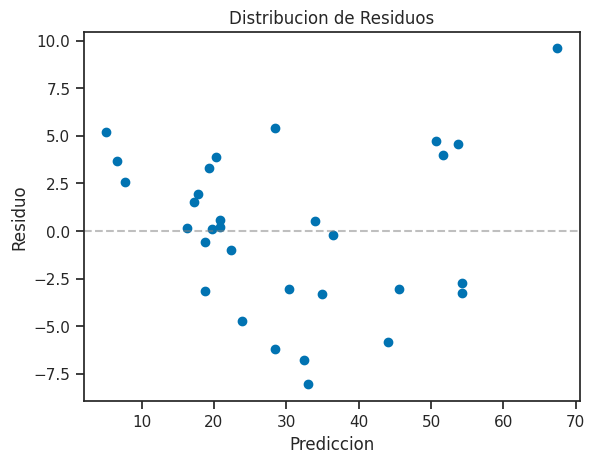

In [405]:
# Residuals Homocedasticity Grafico

# Importamos desde R
%R -o resid1
%R -o fitted1

# Renombramos
resid = resid1
fitted = fitted1

plt.scatter(x=fitted, y=resid)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()

- Se puede observar una fomra de embudo, lo cual ratifica que la distribucion de los residuos no es Homocedastica

#### Autocorrelacion de los Residuos

In [406]:
# Analisis Analitico (Durbin-Watson Test) -> R | H0 No Auto-Correlacion
# 2=No Correlacion (Independecia)| 0=Correlacion Pos | 4=Correlacion Neg
%%R

library(lmtest)
dwtest(model1, alternative='two.sided', iterations=1000)


	Durbin-Watson test

data:  model1
DW = 1.4372, p-value = 0.06941
alternative hypothesis: true autocorrelation is not 0



- Realizamos un test de Auto-correlacion de Durbin-Watson, y con un p-value del 5% no hay suficiente evidencia para rechazar la Hipotesis Nula de que los datos no estan auto-correlacionados. Igualmente hay que tener en cuenta que el p-value es medio border

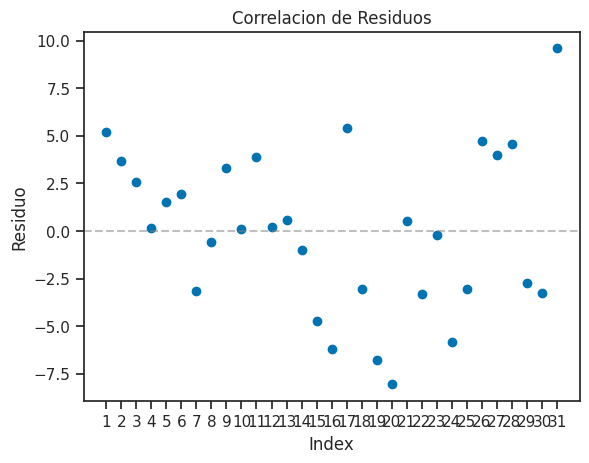

In [407]:
# Analsis Grafico -> Python

plt.scatter(x=data.index, y=resid1)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()

- No se observa ninguna estructura, confirmamos la no-autocorrelacion de los residuos

### Deteccion de Outliers y Valores Influyentes Modelo #1



#### Outliers

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
31 2.837732          0.0083576      0.25909


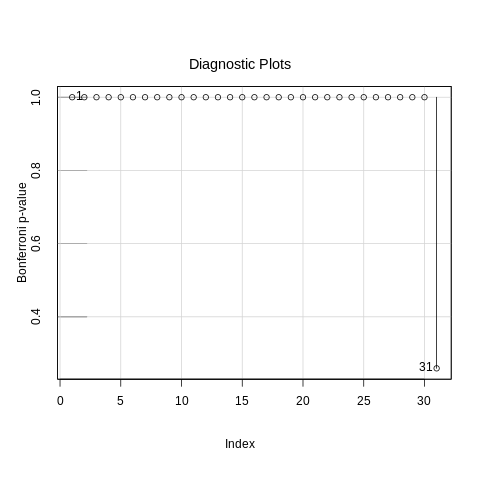

In [408]:
# Outliers
%%R
model = model1
resid = resid1
fitted = fitted1

library(car)

# Outliers - Bonferroni
# qqPlot(resid)
print(outlierTest(model))
influenceIndexPlot(model, vars='Bonf')

# print(data[31, ])

- Realizamos el test de Bonferroni, y la obersvacion #31 parece marcarse como Outlier

Girth     20.6
Height    87.0
Volume    77.0
Name: 31, dtype: float64


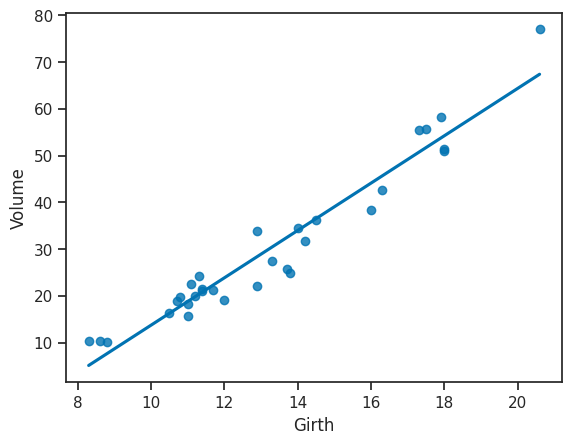

In [409]:
print(data.iloc[30])

sns.regplot(data=data, x='Girth', y='Volume', ci=None)
plt.show()

- Lo confirmamos en el Diagrama de Dispersion, como la observacion #31 (con valor de Girth de 20.6) es un Outlier

#### Valores Influyentes

          V1 crit_leverage leverage
31 0.2151943     0.1935484        1


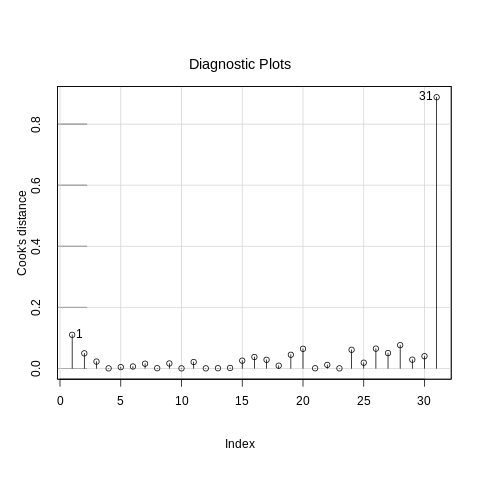

In [410]:
# Valores Influyentes
%%R
model = model1

# Influyentes - Leverage
crit_leverage <- 3*mean(hatvalues(model))
leverage <- hatvalues(model) > crit_leverage
leverage_data <- data.frame(cbind(hatvalues(model), crit_leverage, leverage))
print(subset(leverage_data, leverage==1))

# Influyentes - Cook
influenceIndexPlot(model, vars='Cook')

- Vemos como la misma observacion #31 tiene un apalancamiento muy alto, como asi tambien si distancia de Cook

In [411]:
# Calculamos DFFITS en R
%%R

model = model1

# Influyentes - DFFITS
p <- length(model$coef)
n <- NROW(model$resid)
dffits_crit <- 2*sqrt(p/n)
dffits <- dffits(model)
data_dffits <- data.frame(dffits=dffits)

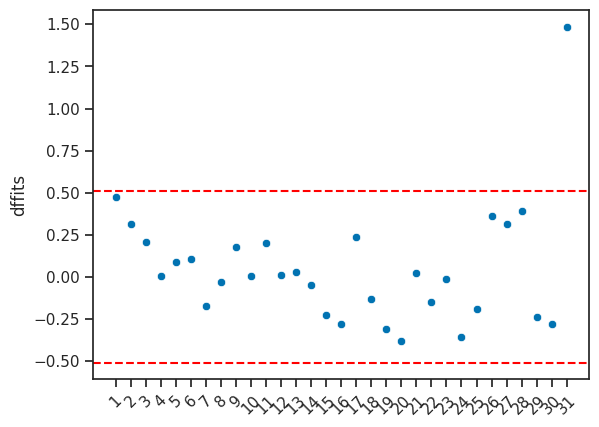

,dffits
31,1.485955


In [412]:
# Ploteamos DFFITS en Python
%R -o data_dffits
%R -o dffits_crit

# Grafico
data_dffits.head()
sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
plt.axhline(y=dffits_crit, linestyle='--', color='red')
plt.axhline(y=-dffits_crit, linestyle='--', color='red')
plt.xticks(rotation=45)
plt.show()

# Filtro los criticos
dffits_crit_low = -dffits_crit
dffits_crit_up = dffits_crit

display(data_dffits.query('dffits > @dffits_crit_up or dffits < @dffits_crit_low'))

In [413]:
# Influyentes - DFBetas
%%R

dfbetas_crit <- 1 # Umbral estandard
dfbetas_data <- dfbetas(model)[,2]>dfbetas_crit
print(which(dfbetas_data))

31 
31 


- Lo mismo vemos cuando calculamos los DDFITS y DFBetas. La observacio #31 es un Punto Influyente

#### Analisis de Diagnostico Modelo 2

In [414]:
%%R

# Modelamos
model2 <- lm(Volume ~ Height, data=data)
resid2 <- model2$resid
fitted2 <- model2$fitted.values


#### Normalida de Residuos


	Shapiro-Wilk normality test

data:  resid2
W = 0.95078, p-value = 0.164

[1] 31 28


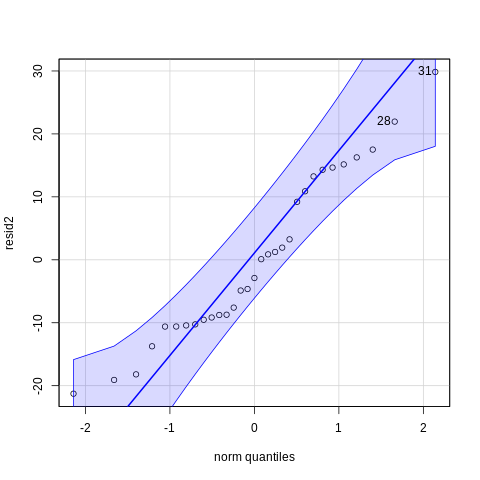

In [415]:
%%R

# Residuals Normality
print(shapiro.test(resid2))
qqPlot(resid2)

- Realizamo un test de Shapiro y confirmamos que hay suficiente evidencia para rechazar la Hipotesis Nula de que los datos estan distribuidos normalmente.
- Lo confirmamos visualmente con un QQPlot, se ven muchos resiudos dentro del Intervalo de Confianza, pero no tan ajustados al fit

#### Homocedasticidad de Residuos

In [416]:
# Analisis Analitico (Breusch-Pagan Test) -> R | H0: Residuos Homocedasticos
%%R

library(lmtest)
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 12.207, df = 1, p-value = 0.0004762



- Relizamos un test de Breusch-Pagan para confirmar la Homocedaistcidad de los resiudos, y confirmamos que hay suficiente evidencia para rechazar la Hipotesis Nula de que los residos son Homocedasticos

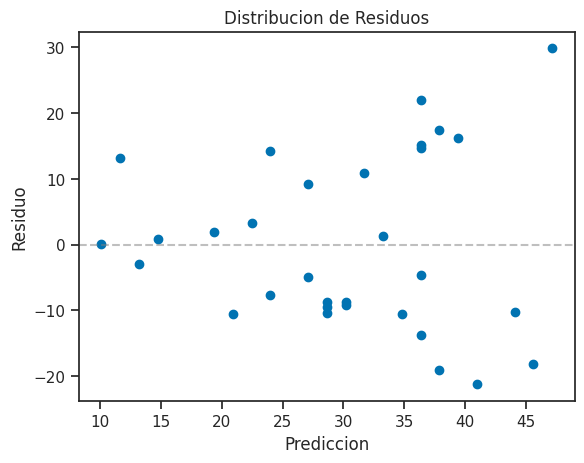

In [417]:
# # Analsis Grafico -> Python

# Importamos desde R
%R -o resid2
%R -o fitted2

# Renombramos
resid = resid2
fitted = fitted2

plt.scatter(x=fitted, y=resid)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()

- Confirmamos la estructura de embudo de los residuos contra los fitted values.

#### Autocorrelacion de Residuos

In [418]:
# Analisis Analitico (Durbin-Watson Test) -> R | H0 No Auto-Correlacion
# 2=No Correlacion (Independecia)| 0=Correlacion Pos | 4=Correlacion Neg
%%R

library(lmtest)
dwtest(model2, alternative='two.sided', iterations=1000)


	Durbin-Watson test

data:  model2
DW = 0.5009, p-value = 1.791e-07
alternative hypothesis: true autocorrelation is not 0



- El Test de Durbin-Watson muestra que podemos rechazar categorimanete la Hipotesis Nula de que no hay auto-correlacion en los residuos

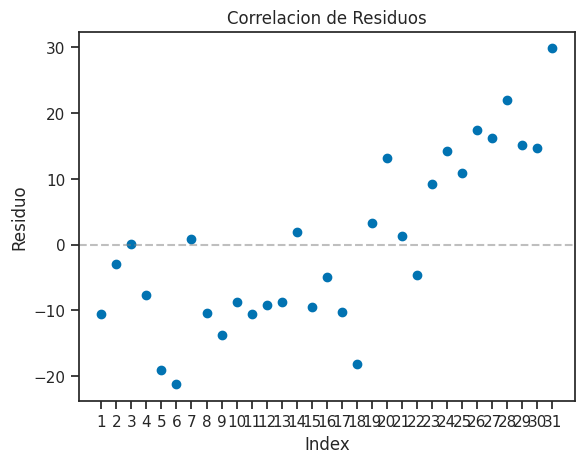

In [419]:
# Analsis Grafico -> Python

plt.scatter(x=data.index, y=resid2)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()

- Se observa una estructura como si fuera lineal, ratificando lo visto anteriormente con el test de Durbin Watson, existe algun tipo de auto-correlacion en los residuos

### Deteccion de Outliers y Valores Influyentes Modelo #2

In [420]:
%%R
model = model2
resid = resid2
fitted = fitted2

library(car)



#### Outliers

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
31 2.622258           0.013969      0.43304


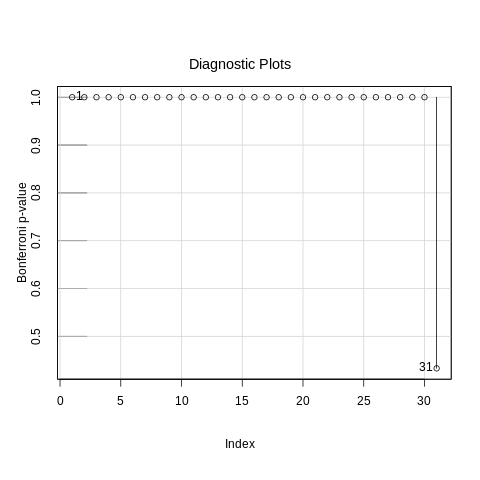

In [421]:
# Outliers - Bonferroni
%%R

# qqPlot(resid)
print(outlierTest(model))
influenceIndexPlot(model, vars='Bonf')

- En el Modelo #2, tambien se marca la observacion #31 como Outlier en el test de Bonferroni

#### Valores Influyentes

[1] V1            crit_leverage leverage     
<0 rows> (or 0-length row.names)
named integer(0)


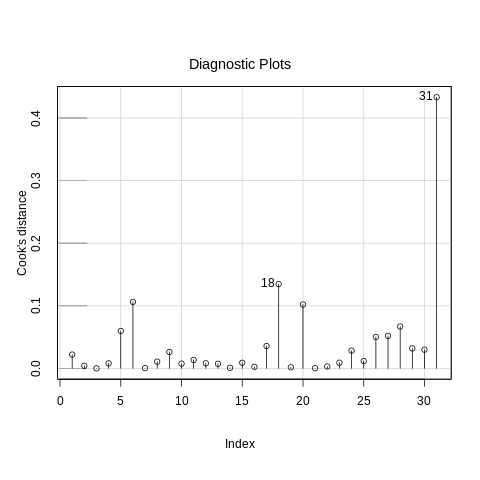

In [422]:
# Influyentes - Leverage
%%R

crit_leverage <- 3*mean(hatvalues(model))
leverage <- hatvalues(model) > crit_leverage
leverage_data <- data.frame(cbind(hatvalues(model), crit_leverage, leverage))
print(subset(leverage_data, leverage==1))
# hist(hatvalues(model))

# Influyentes - Cook
# print(cooks.distance(model))
influenceIndexPlot(model, vars='Cook')

# Influyentes - DFBetas
dfbetas_crit <- 1 # Umbral estandard
dfbetas_data <- dfbetas(model)[,2]>dfbetas_crit
print(which(dfbetas_data))

- Mirando la distancia de Cook, solo parecen ser influyentes las observaciones #18 y #31. Apalancamiento and DFBetas no marcan ninguna observacion como influyente

In [423]:
# Influyentes - DFFITS
%%R

p <- length(model$coef)
n <- NROW(model$resid)
dffits_crit <- 2*sqrt(p/n)
dffits <- dffits(model)
data_dffits <- data.frame(dffits=dffits)

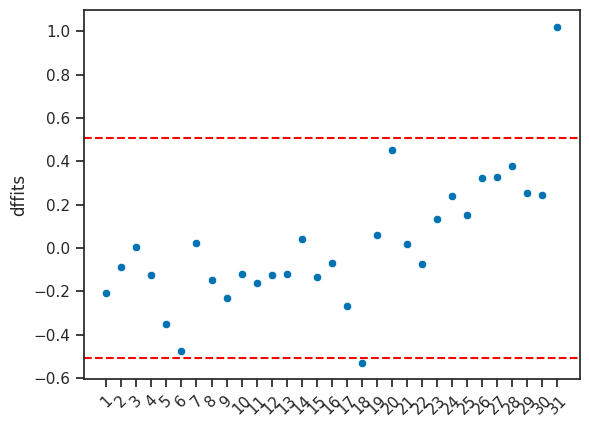

,dffits
18,-0.529214
31,1.020812


In [424]:
# DFFITS Grafico -> Python
%R -o data_dffits
%R -o dffits_crit

# Grafico
data_dffits.head()
sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
plt.axhline(y=dffits_crit, linestyle='--', color='red')
plt.axhline(y=-dffits_crit, linestyle='--', color='red')
plt.xticks(rotation=45)
plt.show()

# Filtro los criticos
dffits_crit_low = -dffits_crit
dffits_crit_up = dffits_crit

display(data_dffits.query('dffits > @dffits_crit_up or dffits < @dffits_crit_low'))


- En los DFFITS tambien vemos marcada las observaciones #18 y #31 como Influyentes

###  Intervalos de Confianza para los coeficientes

In [425]:
# Intervalos de Confianza
%%R

# Modelo 1
print(confint(model1))

# Modelo 2
print(confint(model2))

                 2.5 %     97.5 %
(Intercept) -43.825953 -30.060965
Girth         4.559914   5.571799
                  2.5 %     97.5 %
(Intercept) -146.993871 -27.253357
Height         0.758249   2.328451


- En ambos modelos se ve como los Intervalos de Confianza de cada coeficiente no esta incluido el cero, esto quiere decir que los coeficientes son significativos

### Prediccion Grith con Itervalo de Confianza y de Prediccion

In [426]:
# Bandas de Prediccion
%%R

predichos <- predict(object=model, interval='prediction', level=0.95) # newdata = newdata
nuevos_datos <- data.frame(predichos, data)
# print(head(nuevos_datos))

In [427]:
# Datos a Predecir (Python, other example)
to_predict = [16.1]
newdata = pd.Series(to_predict, name='Girth').to_frame()

%R -i newdata

In [428]:
%%R

predichos_confidence <- predict(object=model1, interval='confidence', level=0.95, newdata=newdata) # newdata = newdata
print(predichos_confidence)

predichos_prediction <- predict(object=model1, interval='prediction', level=0.95, newdata=newdata) # newdata = newdata
print(predichos_prediction)


       fit      lwr      upr
0 44.61683 42.49055 46.74311
       fit      lwr      upr
0 44.61683 35.66437 53.56929


- El Volumen predicho para un arbol de 16.1 pulgadas de diametro es de 44.62
- El Intervalo de Confianza es de [42.49, 46.74]
- El Intervalo de Prediccion es de [35.66, 53.57]

### Ajuste un nuevo modelo sin las observaciones influyentes
Decidimos eliminar las observaciones #31 y #18

In [429]:
# Eliminamos los Outliers e Influyentes
data2 = data.drop(index=['18', '31'])

# Exportamos a R
%R -i data2

In [430]:
# Generamos los modelos simples
%%R

model1_b <- lm(Volume ~ Girth, data=data2)
model2_b <- lm(Volume ~ Height, data=data2)

print(summary(model1_b)) # Mejor
# print(summary(model2_b)) # Peor


Call:
lm(formula = Volume ~ Girth, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5968 -1.8099 -0.0602  2.5825  6.2657 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.2636     3.3100  -10.05 1.28e-10 ***
Girth         4.7652     0.2487   19.16  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.849 on 27 degrees of freedom
Multiple R-squared:  0.9315,	Adjusted R-squared:  0.9289 
F-statistic:   367 on 1 and 27 DF,  p-value: < 2.2e-16



### Comparacion de Modelos

In [431]:
# Modelo RLM
%%R

model_multiple <- lm(Volume ~ ., data=data2)
# print(summary(model_multiple))

print(anova(model1_b, model_multiple)) # H0: Model 2 no aporta nada nuevo

Analysis of Variance Table

Model 1: Volume ~ Girth
Model 2: Volume ~ Girth + Height
  Res.Df    RSS Df Sum of Sq      F  Pr(>F)   
1     27 400.08                               
2     26 291.38  1     108.7 9.6995 0.00445 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- Realizamos in ANOVA test a ambos modelos, y podemos confirmar que hay suficiente evidencia para rechazar la Hipotesis Nula que indica que el Modelo Multiple no aporta nada nuevo que el mejor Modelo Simple

## 2.2 Modelo con Interaccion

In [432]:
# Cargamos Dataset de Publicidad
data = dataPu

data.head()

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- Estimo que hay un error en el enunciado y que las ventas estan en Millones, y el resto de las variables predictoras en Miles

In [433]:
# Transformo las variables a sus respectivas magnitudes

data['tv'] = data['tv']*1000
data['radio'] = data['radio']*1000
data['periodico'] = data['periodico']*1000
data['ventas'] = data['ventas']*1000000

# Exporamos a R
%R -i data

%R head(data)

,tv,radio,periodico,ventas
0,230100.0,37800.0,69200.0,22100000.0
1,44500.0,39300.0,45100.0,10400000.0
2,17200.0,45900.0,69300.0,9300000.0
3,151500.0,41300.0,58500.0,18500000.0
4,180800.0,10800.0,58400.0,12900000.0
5,8700.0,48900.0,75000.0,7200000.0


### a) Creacion de Modelos y Analisis de Diagnostico

In [434]:
# Creo los Modelos Lineales Simples
%%R

model_tv <- lm(ventas ~ tv, data=data)
resid_tv <- model_tv$resid
fitted_tv <- model_tv$fitted.values

model_radio <- lm(ventas ~ radio, data=data)
resid_radio <- model_radio$resid
fitted_radio <- model_radio$fitted.values

model_periodico <- lm(ventas ~ periodico, data=data)
resid_periodico <- model_periodico$resid
fitted_periodico <- model_periodico$fitted.values


	Shapiro-Wilk normality test

data:  resid_tv
W = 0.99053, p-value = 0.2133



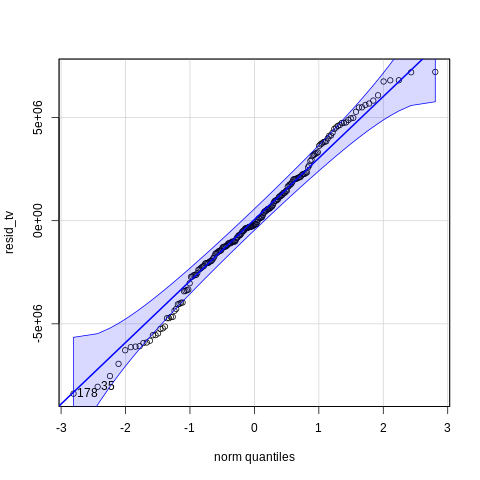

In [435]:
# Analisis de Diagnostico
%%R
library(car)

# Model TV
qqPlot(resid_tv)
print(shapiro.test(resid_tv))

- Se puede apreciar mediante el test de Normalidad de Shapiro que no hay suficiente evidencia para rechazar la Hipotesis Nula de Normalidad de los residuos

In [436]:
# Analisis Analitico (Breusch-Pagan Test) -> R | H0: Residuos Homocedasticos
%%R

library(lmtest)
bptest(model_tv)


	studentized Breusch-Pagan test

data:  model_tv
BP = 48.038, df = 1, p-value = 4.18e-12



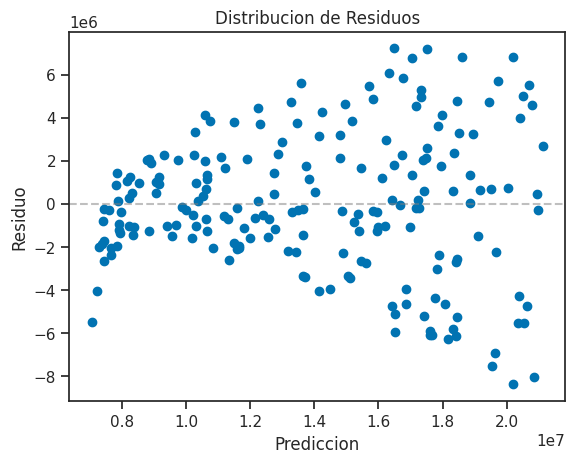

In [437]:

# # Analsis Grafico -> Python

# Importamos desde R
%R -o resid_tv
%R -o fitted_tv


plt.scatter(x=fitted_tv, y=resid_tv)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()

- El test de Breusch-Pagan nos indica que hay suficiente evidencia para rechazar la Hipotesis Nula de que los residuos son homocedasticos
- Confirmamos la Heterocidad de los residuos en la grafica. Se puede observar la estructura de embudo que indica que a valores mas grandes de las predicciones, mas grande son los resiudos

In [438]:
# Analisis Analitico (Durbin-Watson Test) -> R | H0 No Auto-Correlacion
# 2=No Correlacion (Independecia)| 0=Correlacion Pos | 4=Correlacion Neg
%%R

library(lmtest)
dwtest(model_tv, alternative='two.sided', iterations=1000)


	Durbin-Watson test

data:  model_tv
DW = 1.9347, p-value = 0.6426
alternative hypothesis: true autocorrelation is not 0



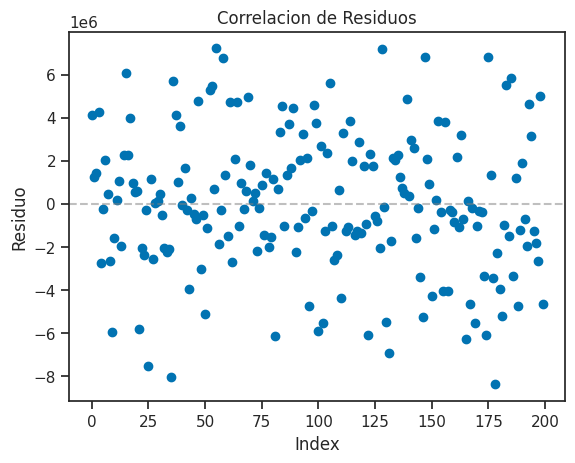

In [439]:
# Analsis Grafico -> Python

# Importamos desde R

plt.scatter(x=data.index, y=resid_tv)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()

- Realizamos el test de Durbin-Watson y vemos que no hay suficiente evidencia para rechazar la no-autocorrelacion de los residuos.
- Lo confirmamos con la grafica donde no se observa ningun tipo de estructura en los residuos segun so indice del dataset

In [440]:
# Analisis de Diagnosticos Analiticos para radio
%%R

# Radio
print(shapiro.test(resid_radio))
print(bptest(model_radio))
print(dwtest(model_radio, alternative='two.sided', iterations=1000))


	Shapiro-Wilk normality test

data:  resid_radio
W = 0.96072, p-value = 2.367e-05


	studentized Breusch-Pagan test

data:  model_radio
BP = 36.646, df = 1, p-value = 1.417e-09


	Durbin-Watson test

data:  model_radio
DW = 1.9457, p-value = 0.6997
alternative hypothesis: true autocorrelation is not 0



- Confirmamos que para el modelo de radio, los residuos no son normales ni homocedasticos, pero que si no estan autocorrelacionados

In [441]:
# Analisis de Diagnosticos Analiticos para periodico
%%R

# periodico
print(shapiro.test(resid_periodico))
print(bptest(model_periodico))
print(dwtest(model_periodico, alternative='two.sided', iterations=1000))


	Shapiro-Wilk normality test

data:  resid_periodico
W = 0.98197, p-value = 0.0114


	studentized Breusch-Pagan test

data:  model_periodico
BP = 2.4717, df = 1, p-value = 0.1159


	Durbin-Watson test

data:  model_periodico
DW = 1.9834, p-value = 0.9025
alternative hypothesis: true autocorrelation is not 0



- Para el modelo de periodico los residuos no siguen una distribucion normal, pero si son homocedastico y no-autcorrelacionados

### b) Modelo Aditivo y Test de Wald

In [442]:
data.head()

,tv,radio,periodico,ventas
0,230100.0,37800.0,69200.0,22100000.0
1,44500.0,39300.0,45100.0,10400000.0
2,17200.0,45900.0,69300.0,9300000.0
3,151500.0,41300.0,58500.0,18500000.0
4,180800.0,10800.0,58400.0,12900000.0


In [443]:
# LRM en Python

# Generamos el Modelo
data = sm.add_constant(data)
model = smf.ols('ventas ~ tv + radio + periodico', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        09:16:14   Log-Likelihood:                -3149.3
No. Observations:                 200   AIC:                             6307.
Df Residuals:                     196   BIC:                             6320.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.939e+06   3.12e+05      9.422      0.0

- En el modelo aditivo vemos el p-value del modelo general es muy significativo
- En los test de Wald se verifica como la variable periodico no es significativa, si p-value es muy alto

### c) Comparacion de modelos simples

In [444]:
# LRM en Python
model_tv = smf.ols('ventas ~ tv', data=data).fit()
model_radio = smf.ols('ventas ~ radio', data=data).fit()
model_periodico = smf.ols('ventas ~ periodico', data=data).fit()

# Mostramos
print(model_tv.summary())
print(model_radio.summary())
print(model_periodico.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        09:16:14   Log-Likelihood:                -3282.1
No. Observations:                 200   AIC:                             6568.
Df Residuals:                     198   BIC:                             6575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.033e+06   4.58e+05     15.360      0.0

- Se observan el mejor de los tres modelos segun AIC, BIC y R2adj es el modelo de TV
- Python no muestra el CP_Mallows

### e) Modelos con y sin Interaccion